In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [3]:
query = "(@undipmenfess) -filter:links filter:replies"
maxTweets = 10

# Creating list to append tweet data to
tweets = []

# Using TwitterSearchScraper to scrape
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>maxTweets:
        break
    tweets.append([tweet.id, tweet.content])

In [4]:
tweets_df = pd.DataFrame(tweets, columns=['id', 'content']) 
tweets_df

,id,content
0,1608163888432046080,@undipmenfess Adv
1,1608163781733154816,"@undipmenfess dari yang sudah sudah, hanya kau..."
2,1608163755413876736,@undipmenfess Sini cerita dulu... Ada apa sih?
3,1608163677861212163,@undipmenfess rapopo iseh iso jaluk wong tuamu...
4,1608163453172322304,"@undipmenfess ma,pa, nilai aki segini, maaf ga..."
5,1608163446637604865,@undipmenfess admin atmnya mahal (2rb diambil ...
6,1608163430921539584,@undipmenfess saya siapp nangis memikirkan gmn...
7,1608163328085602305,@undipmenfess semangat senderr! semoga kuat sa...
8,1608163215825055744,@undipmenfess Mauuu dong nderrd
9,1608162336262746112,@undipmenfess jatinangor 😭😭


In [5]:
import re
# cleaning mentions, hastag and links from tweets
tweets_df['content'] = tweets_df['content'].str.replace('@[^\s]+','')
tweets_df['content'] = tweets_df['content'].str.replace('#[^\s]+','')
tweets_df['content'] = tweets_df['content'].str.replace('http\S+','')
tweets_df['content'] = tweets_df['content'].str.replace('pic.twitter.com\S+','')
tweets_df['content'] = tweets_df['content'].str.replace('RT','')
tweets_df['content'] = tweets_df['content'].str.replace('amp','')
# remove emoticon
tweets_df['content'] = tweets_df['content'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

# remove whitespace leading & trailing
tweets_df['content'] = tweets_df['content'].str.strip()

# remove multiple whitespace into single whitespace
tweets_df['content'] = tweets_df['content'].str.replace('\s+', ' ')

# remove row with empty content
tweets_df = tweets_df[tweets_df['content'] != '']

tweets_df

C:\Users\syair dafiq\AppData\Local\Temp\ipykernel_5684\4166602414.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['content'] = tweets_df['content'].str.replace('@[^\s]+','')
C:\Users\syair dafiq\AppData\Local\Temp\ipykernel_5684\4166602414.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['content'] = tweets_df['content'].str.replace('#[^\s]+','')
C:\Users\syair dafiq\AppData\Local\Temp\ipykernel_5684\4166602414.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['content'] = tweets_df['content'].str.replace('http\S+','')
C:\Users\syair dafiq\AppData\Local\Temp\ipykernel_5684\4166602414.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['content'] = tweets_df['content'].str.replace('pic.twitter.com\S+','')
C:\Users\syair dafiq\AppData\Local\Te

,id,content
0,1608163888432046080,Adv
1,1608163781733154816,"dari yang sudah sudah, hanya kaulah arti rumah"
2,1608163755413876736,Sini cerita dulu... Ada apa sih
3,1608163677861212163,rapopo iseh iso jaluk wong tuamu maneh
4,1608163453172322304,"ma,pa, nilai aki segini, maaf ga terlalu memua..."
5,1608163446637604865,admin atmnya mahal 2rb diambil sama mas mas di...
6,1608163430921539584,saya siapp nangis memikirkan gmn nabung uangny...
7,1608163328085602305,"semangat senderr semoga kuat sai tamat yah, i ..."
8,1608163215825055744,Mauuu dong nderrd
9,1608162336262746112,jatinangor


In [8]:
from transformers import pipeline

# load model
classifier = pipeline('sentiment-analysis', model = "model")

In [10]:
# predict sentiment
tweets_df['sentiment'] = tweets_df['content'].apply(lambda x: classifier(x)[0]['label'])
tweets_df

,id,content,sentiment
0,1608163888432046080,Adv,positif
1,1608163781733154816,"dari yang sudah sudah, hanya kaulah arti rumah",positif
2,1608163755413876736,Sini cerita dulu... Ada apa sih,negatif
3,1608163677861212163,rapopo iseh iso jaluk wong tuamu maneh,negatif
4,1608163453172322304,"ma,pa, nilai aki segini, maaf ga terlalu memua...",positif
5,1608163446637604865,admin atmnya mahal 2rb diambil sama mas mas di...,negatif
6,1608163430921539584,saya siapp nangis memikirkan gmn nabung uangny...,negatif
7,1608163328085602305,"semangat senderr semoga kuat sai tamat yah, i ...",positif
8,1608163215825055744,Mauuu dong nderrd,positif
9,1608162336262746112,jatinangor,netral


In [60]:
import plotly.express as px
import pandas as pd

In [61]:
df = pd.read_csv("assets/data.csv")
df.head()

,date,content,sentiment
0,2022-12-29 06:01:04+00:00,Senangnya lihat Saudara2 kita di Bima Sumbawa ...,positif
1,2022-12-29 06:00:47+00:00,Sy juga kl kemana2 senengnya ke pasar pak. Kap...,positif
2,2022-12-29 06:00:15+00:00,"Mantap pak, Semoga sehat selalu dan aminn",positif
3,2022-12-29 05:59:49+00:00,Bupati gubernur pada kemana ya,negatif
4,2022-12-29 05:59:22+00:00,Lebih baik pergi ke sana....,negatif


In [3]:
df_bar = df.groupby(['sentiment']).count().reset_index()
df_bar

,sentiment,date,content
0,negatif,52,52
1,netral,14,14
2,positif,28,28


In [ ]:
# plot barchart sentiment
fig = px.bar(df_bar, y="sentiment", x="content", color="sentiment",text = "content", color_discrete_map={"positif": "#00cc96", "negatif": "#ef553b","netral": "#636efa"})
# hide legend
fig.update_layout(showlegend=False)
# set title in center
fig.update_layout(title_x=0.5)
fig.update_layout(title_text='Jumlah Komentar Menurut Sentimen')
# set annotation in bar
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# set y axis title
fig.update_xaxes(title_text='Jumlah Komentar')

# horizontal bar

fig.show()

In [62]:
df_word = df[["content","sentiment"]]
df_word.head() 

,content,sentiment
0,"Coba tersangkane gae kebaya, mesti cepet nangk...",negatif
1,Sehat selalu bapak.,positif
2,Orang Yaman harusnya cinta tanah airnya dgn Ya...,negatif
3,Aamiin ya Tuhan,positif
4,KOMA ny kayak berudu.. Gus,negatif


In [59]:
import string 
import re #regex library

# import word_tokenize from NLTK
from transformers import AutoTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [79]:
stopwords = pd.read_csv("assets/stopwordbahasa.csv", header=None)
stopwords = stopwords[0].tolist()
more_stopword = ["ga","iya","dg",'dengan', 'ia','bahwa','oleh',"sy","kl","gak","ah","apa","kok","mau","yg","pak","bapak","ibu","krn","nya","ya"]
stopwords = stopwords + more_stopword + list(string.punctuation)

tokenizer = AutoTokenizer.from_pretrained('model')
tokens = df.content.apply(lambda x: tokenizer.tokenize(x))
tokens = tokens.apply(lambda x: [x for x in x if (not x.startswith('##') and x not in stopwords and len(x) > 4)])
tokens

# remove 3 letter words


0     [senangnya, lihat, saudara, sumbawa, menyambut...
1         [kemana, seneng, pasar, diajak, pasar, smoga]
2                               [mantap, semoga, sehat]
3                            [bupati, gubernur, kemana]
4                                               [pergi]
                            ...                        
89             [sedia, perahu, hujan, perahu, berenang]
90                                      [bakso, dijual]
91                                                   []
92                                       [drama, korea]
93                              [jadikan, ketua, lurah]
Name: content, Length: 94, dtype: object

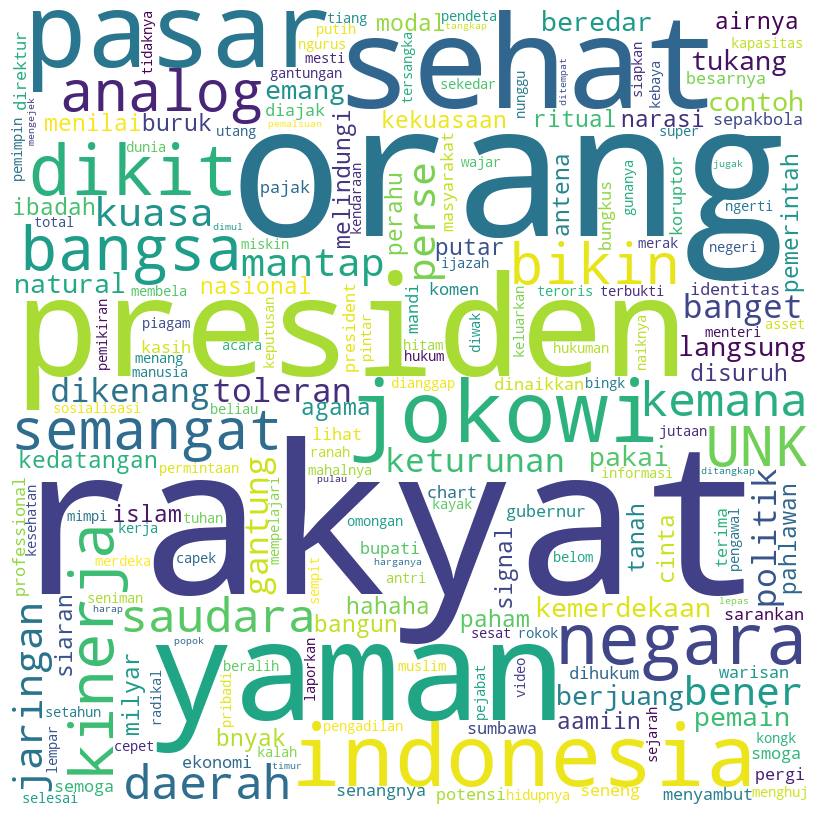

In [80]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
comment_words = ''
 
# iterate through the csv file
for token in tokens:
    comment_words += " ".join(token)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

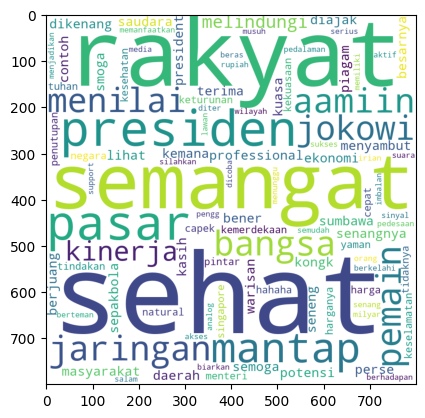

In [83]:
def tokenisasi(df):
    stopwords = pd.read_csv("assets/stopwordbahasa.csv", header=None)
    stopwords = stopwords[0].tolist()
    more_stopword = ["ga","iya","dg",'dengan', 'ia','bahwa','oleh',"sy","kl","gak","ah","apa","kok","mau","yg","pak","bapak","ibu","krn","nya","ya"]
    stopwords = stopwords + more_stopword + list(string.punctuation)

    tokenizer = AutoTokenizer.from_pretrained('model')
    tokens = df.content.apply(lambda x: tokenizer.tokenize(x))
    tokens = tokens.apply(lambda x: [x for x in x if (not x.startswith('##') and x not in stopwords and len(x) > 4)])
    return tokens

def get_wordcloud(df,kelas_sentiment):
    tokens = tokenisasi(df[df.sentiment == kelas_sentiment])
    tokens = tokens.apply(lambda x: ' '.join(x))
    text = ' '.join(tokens)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(text)
    return wordcloud

wordcloud_pos = get_wordcloud(df,"positif")
plt.imshow(wordcloud_pos)